In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

# sel should be done after ReLU
# before or after BN
# outliers! -> maybe we can see how the network becomes dependent on single directions
# upon memorization
# figure 2

with open("./log/sel.pickle", "rb") as f:
    sel = pickle.load(f)

with open("./log/imp.pickle", "rb") as f:
    imp = pickle.load(f)

In [68]:
sel[0], np.array(imp[0]) / 10000.

(array([0.2153341 , 0.09377919, 0.10056962, 0.13797425, 0.29438835,
        0.1236242 , 0.05654106, 0.13854675, 0.4865573 , 0.14255427,
        0.04438834, 0.0784284 , 0.31481075, 0.20932019, 0.21214588,
        0.5110824 , 0.08595061, 0.28658208, 0.10954314, 0.15339448,
        0.7012466 , 0.08237784, 0.05836496, 0.03253026, 0.10003196,
        0.21699052, 0.15764214, 0.02904513, 0.04233044, 0.11189558,
        0.14371754, 0.18375061, 0.06246414, 0.16653511, 0.10373725,
        0.08179551, 0.12907374, 0.31982452, 0.372672  , 0.19359735,
        0.12939888, 0.20680913, 0.10798635, 0.06087598, 0.18721722,
        0.03892492, 0.02215566, 0.3594806 , 0.4241405 , 0.06251738,
        0.09995323, 0.1203436 , 0.2209774 , 0.12966391, 0.03525809,
        0.12095548, 0.15930046, 0.02499628, 0.06063338, 0.02759092,
        0.35388   , 0.24254462, 0.11986233, 0.03095893], dtype=float32),
 array([ 1.47552734e-02,  2.57807617e-03,  1.25649414e-03,  1.10447754e-02,
        -7.40820313e-04,  1.7073730

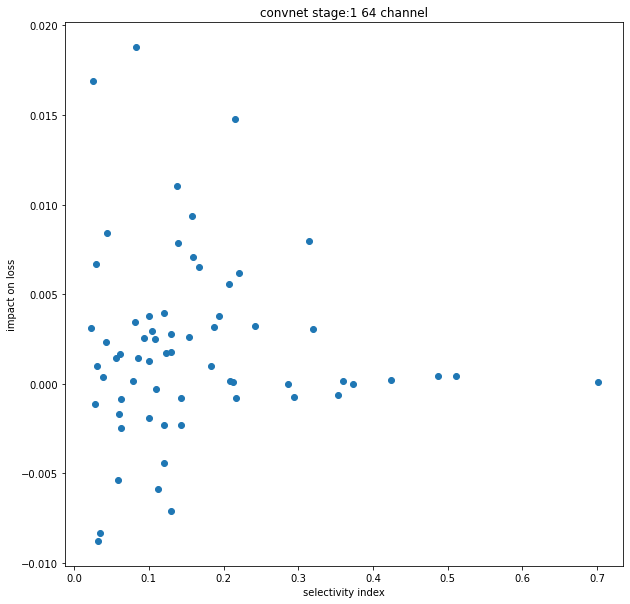

In [53]:
plt.title("convnet stage:1 64 channel")
plt.xlabel("selectivity index")
plt.ylabel("impact on loss")
plt.scatter(sel[0], np.array(imp[0]) / 10000)
plt.show()

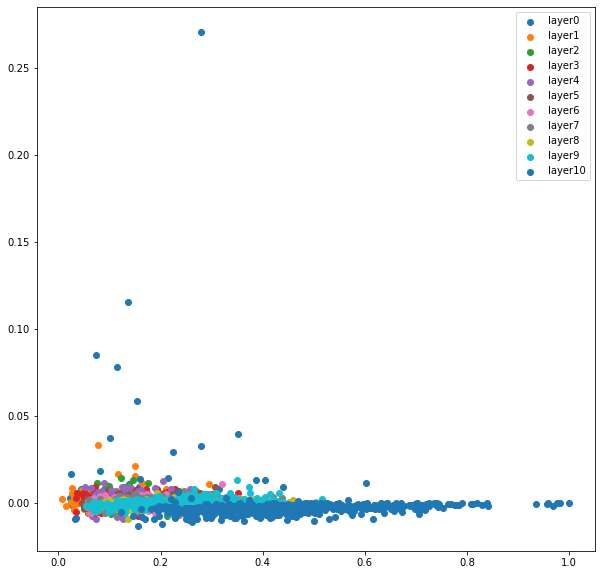

In [65]:
plt.rcParams["figure.figsize"] = (10, 10)
for i in range(len(sel)):
    plt.scatter(sel[i], np.array(imp[i]) / 10000, label='layer{}'.format(i))
plt.legend()
plt.show()

In [69]:
from sklearn.linear_model import LinearRegression

corr_list = []
for i in range(len(imp) - 1):
    fit = LinearRegression().fit(np.array(sel[i]).reshape([-1, 1]), np.array(imp[i]).reshape([-1, 1]) / 10000.)
    corr_list.append(fit.coef_[0, 0])

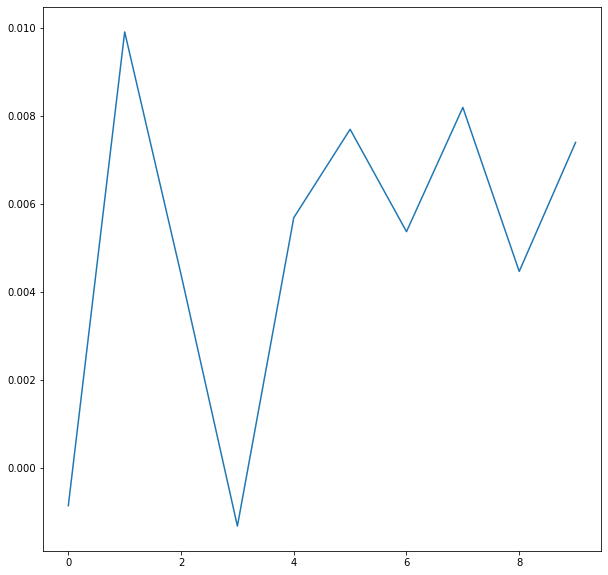

In [70]:
plt.plot(corr_list)

In [27]:
corr_list

[array([[-0.00080827]], dtype=float32),
 array([[0.56013036]], dtype=float32),
 array([[-0.00020393]], dtype=float32),
 array([[-0.26234886]], dtype=float32),
 array([[0.12929243]], dtype=float32),
 array([[0.17614952]], dtype=float32),
 array([[-0.01325605]], dtype=float32),
 array([[0.19304866]], dtype=float32),
 array([[0.14236085]], dtype=float32),
 array([[0.13342494]], dtype=float32),
 array([[0.08701723]], dtype=float32)]

In [31]:
6952 / 10000 * 256

177.9712